## Code for running baseline and AI Rogers Paradox simulations

In [1]:


from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import os

import importlib 

import simulation 
import utils
import copy

In [2]:
# Base configuration for sims

base_params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0.0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "both", # Who can agents socially learn from: "", "human", "ai", "both"
    "resignation": False, 
    "resignation_hint": 1,
    "ai_individ_learn": False,
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "base" # Name of current simulation (will be used in figure filenames)
}

## Baseline simulation 2A
### Individual learning only

collective model understanding
0.5831214400000001


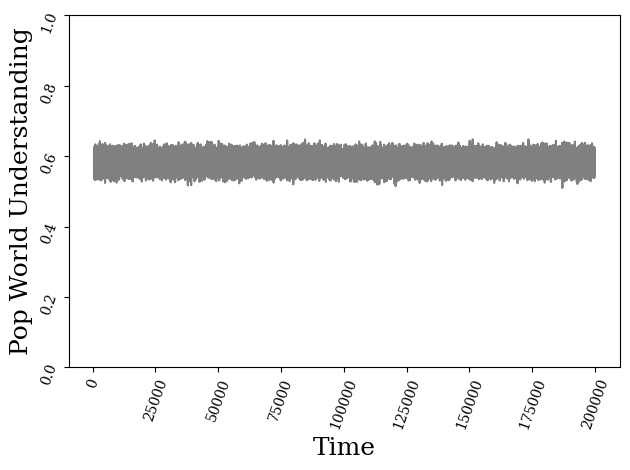

In [3]:
importlib.reload(utils)
importlib.reload(simulation)

%matplotlib inline

params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = ''
params_dict['sim_name'] = 'sec_2_baseline_individual_only'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

## Baseline simulation 2B
### Agents can learn individually or socially, but not both
### Agents can learn socially from other people

collective model understanding
0.5781361249999999


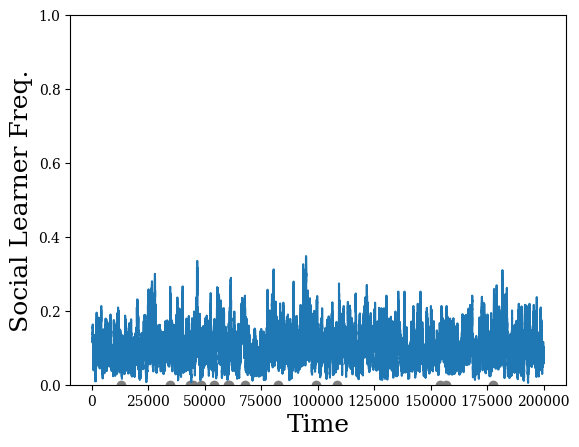

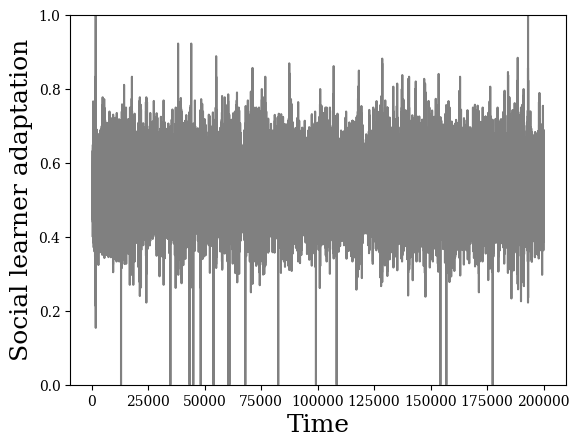

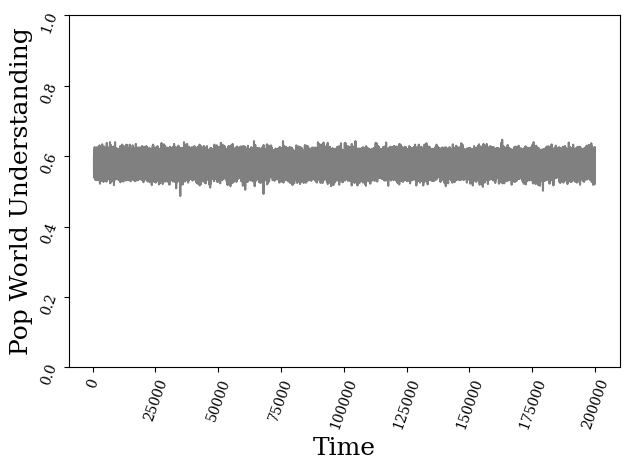

In [4]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'human'
params_dict['sim_name'] = 'sec_2_baseline_original_RP'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

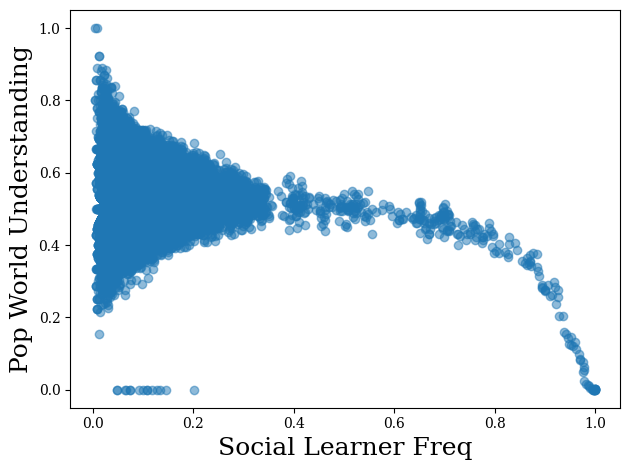

In [5]:
plt.scatter( social_learner_freqs, social_learner_adaptation,alpha=0.5)
plt.xlabel("Social Learner Freq", fontsize=18)
plt.ylabel("Pop World Understanding", fontsize=18)
plt.tight_layout()
plt.savefig('figures/base_social_learn_freq_rp.pdf', dpi=400)

## Incorporating AI into Rogers Paradox Simulations
### Agents can learn individually or socially, but not both
### Agents can learn socially from other people, or socially from the AI
### AI learns socially from the mean the population

collective model understanding
0.578061135


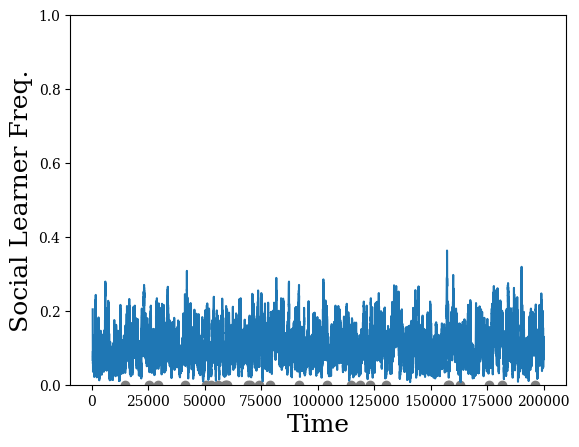

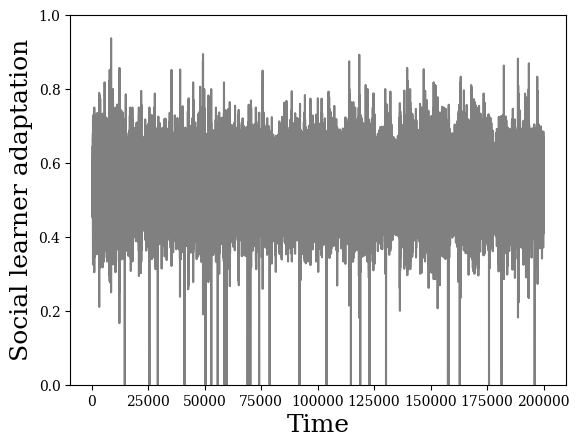

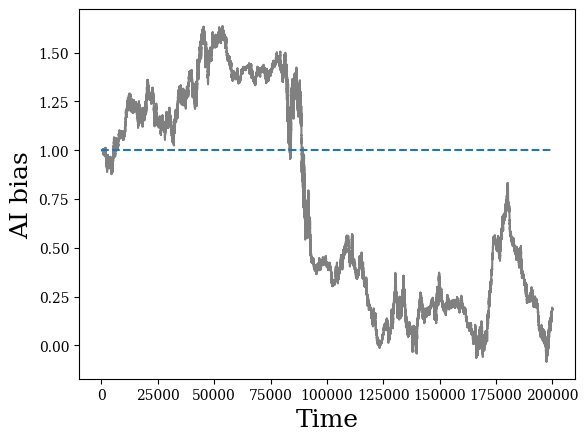

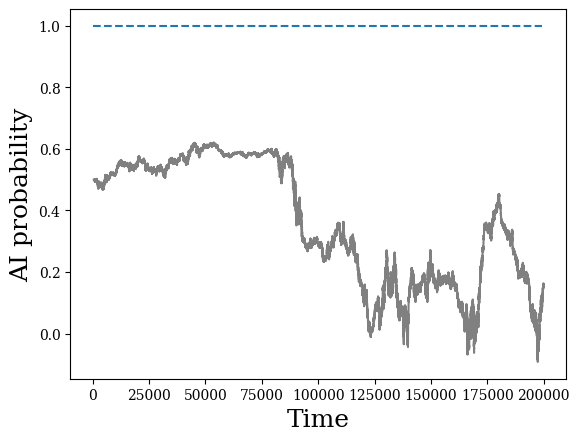

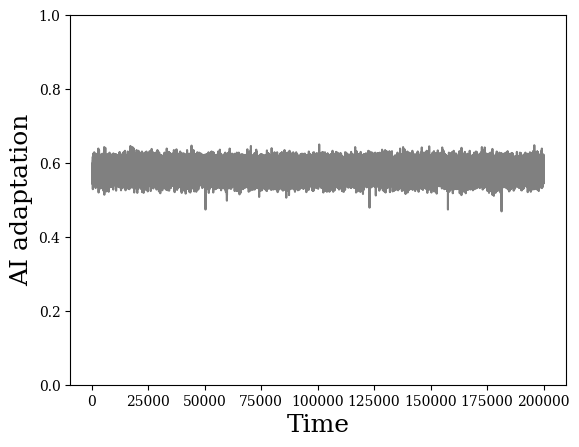

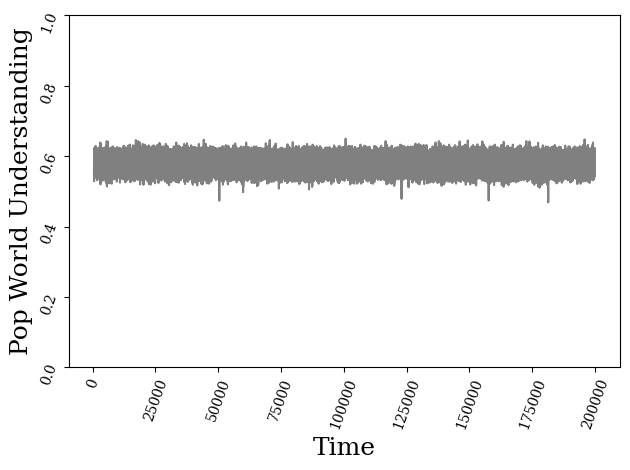

In [6]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'both'
params_dict['sim_name'] = 'sec_2_baseline_ai'

importlib.reload(utils)
social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))



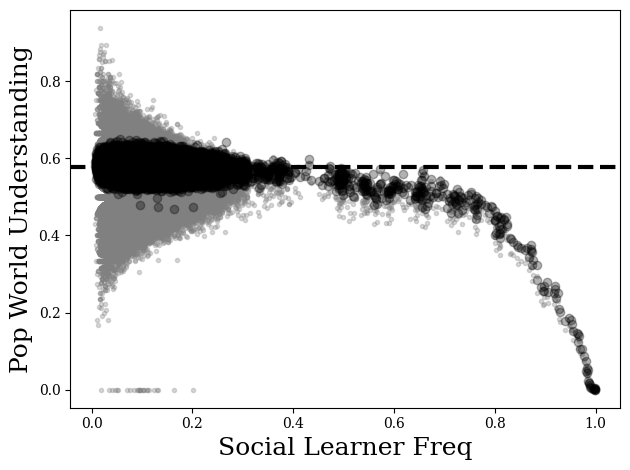

In [7]:
plt.scatter(social_learner_freqs, social_learner_adaptation, marker='.', #color='red',
             alpha=0.3, color='grey')
plt.scatter( social_learner_freqs, learner_adaptation,alpha=0.3, color='black')
plt.axhline(np.mean(learner_adaptation), linestyle='--', color='black', linewidth=3)



plt.xlabel("Social Learner Freq", fontsize=18)
plt.ylabel("Pop World Understanding", fontsize=18)
plt.tight_layout()
plt.savefig('figures/base_ai_social_learn_freq_rp.png', dpi=400)

## "Choose who to learn from"
### Agents learn from AI/other humans or individually
### AI learns socially from mean
### AI unavailable if E[AI]<E[I]
### Note: this is essentially a "who" strategy

collective model understanding
0.578144525


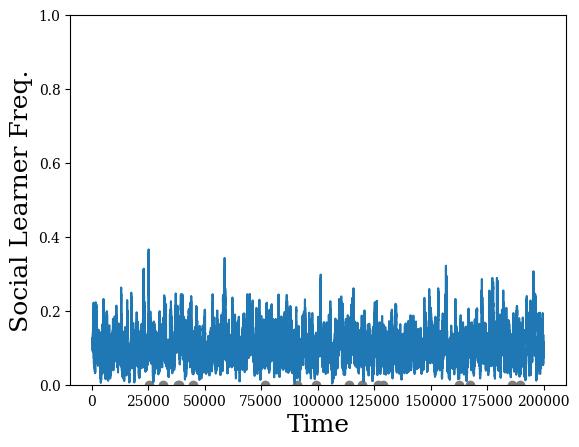

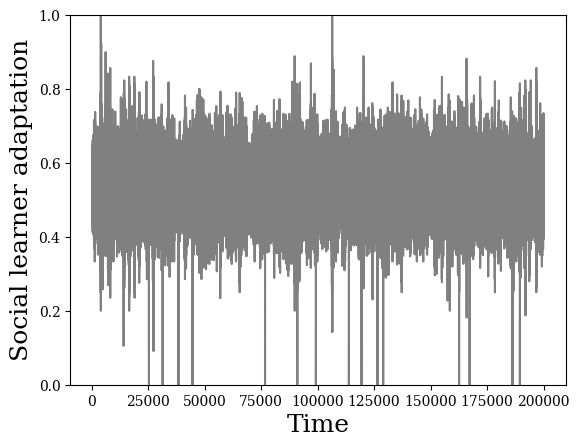

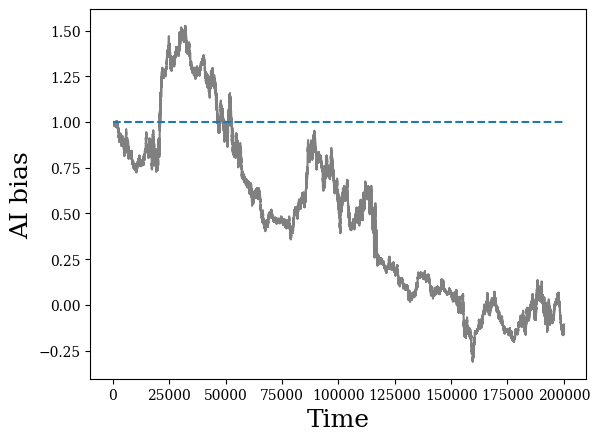

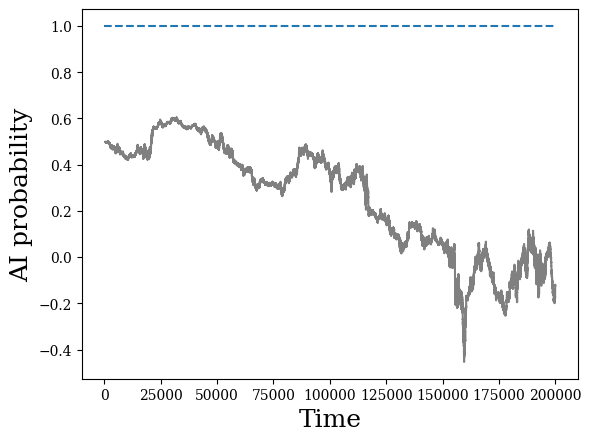

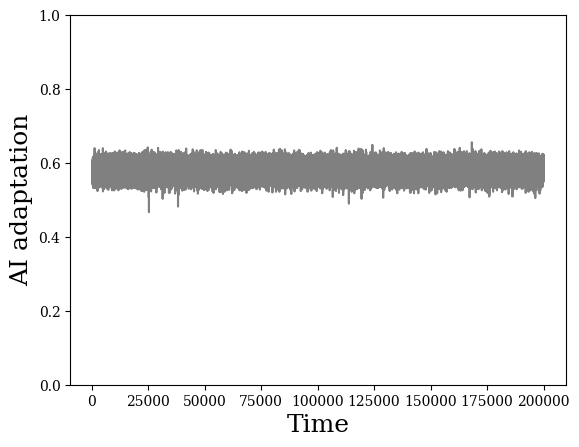

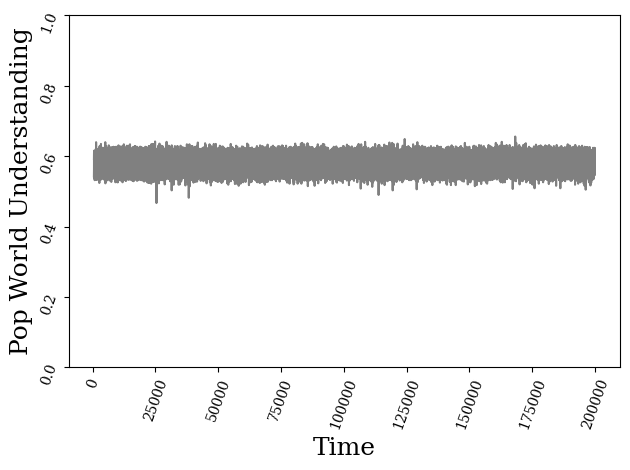

In [8]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'both'
params_dict['resignation'] = True # Should AI resign if E[AI]<E[I]
params_dict['resignation_hint'] = 1.0 #When AI resigns it should provide a hint that decreases cost of ind learning by this multiplier
params_dict['sim_name'] = 'choose_who_3.1.1'

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], 
    mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], 
    resignation_hint=params_dict["resignation_hint"], critical=params_dict["critical"], 
    ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

### Critical social learning in different rates of enviornment change

1000
1000
1000


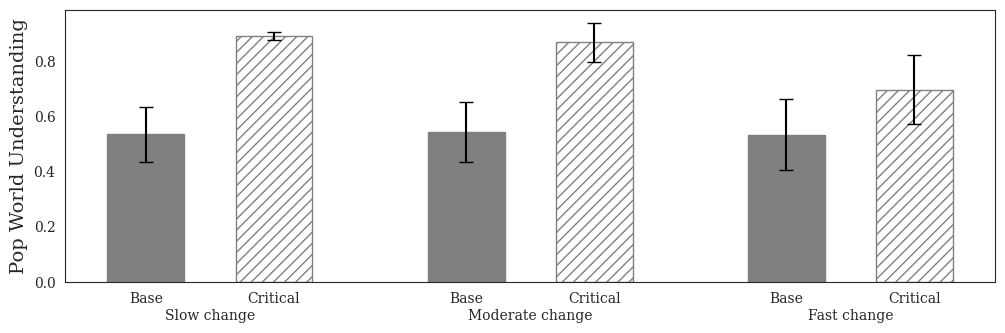

In [9]:
import pandas as pd
params_dict_local_base = copy.copy(base_params_dict) 
params_dict_local_base['social_learning_mode'] = 'ai'
params_dict_local_base['sim_name'] = 'sec_3_1_2_override'
params_dict_local_base['n_records'] = 1000

critical_vary = [False, True]
world_change_rates = {'slow': 0.0001, 'moderate': 0.05, 'fast': 0.5}
importlib.reload(utils)

score_data = {
    'critical': [], 
    'u': [],
    'ai_bias': [],
    'score': [],
    'timestep': []
}

all_scores = []
for allow_critical in critical_vary: 
    scores = []
    for world_change, world_change_rate in world_change_rates.items(): 
        params_dict = copy.copy(params_dict_local_base)
        params_dict['u'] = world_change_rate
        params_dict['critical'] = allow_critical
    

        social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
            N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
            z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
            social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
        )
        scores.append(learner_adaptation)
        
        for t, score in enumerate(learner_adaptation): 
            score_data['critical'].append(allow_critical)
            score_data['u'].append(world_change),
            score_data['score'].append(score)
            score_data['timestep'].append(t)
            score_data['ai_bias'].append(ai_bias_means[t]/ai_bias_means[t]+1)
        
        
    all_scores.append(scores)
df = pd.DataFrame.from_dict(score_data)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importlib.reload(utils)

plt.rcParams['font.family'] = 'serif'
# Set style
sns.set_style("white")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4))
grey_color = '#808080'

# Create barplot for each u value and critical state
positions = np.array([1, 2, 3.5, 4.5, 6, 7])  # Reduced gaps between groups
base_labels = ['Base', 'Critical']
change_labels = ['Slow change', 'Moderate change', 'Fast change']

for i, u in enumerate(world_change_rates):
    # Filter data for each u value
    u_data = df[df['u'] == u]
    
    # Calculate means and standard errors
    data_false = u_data[u_data['critical'] == False]['score']
    data_true = u_data[u_data['critical'] == True]['score']

    mean_false = data_false.mean()
    mean_true = data_true.mean()

    print(len(data_true))

    se_false = data_false.std() 
    se_true = data_true.std() 
    
    ax.bar(positions[i*2], mean_false, width=0.6, yerr=se_false, capsize=5,
           color=grey_color, edgecolor=grey_color,
           error_kw={'capthick': 1, 'elinewidth': 1.5})
    ax.bar(positions[i*2 + 1], mean_true, width=0.6, yerr=se_true, capsize=5,
           color='white', edgecolor=grey_color, hatch='///',  # Added back hatching
           error_kw={'capthick': 1, 'elinewidth': 1.5})


ax.set_xticks(positions)
ax.set_xticklabels(['Base', 'Critical'] * 3, fontfamily='serif')

for i, label in enumerate(change_labels):
    mid_point = (positions[i*2] + positions[i*2 + 1]) / 2
    ax.text(mid_point, -0.1, label, ha='center', va='top', 
            transform=ax.get_xaxis_transform(), fontfamily='serif')

ax.set_ylabel('Pop World Understanding', fontsize=14, fontfamily='serif')

# Make sure all tick labels use serif font
plt.setp(ax.get_xticklabels(), fontfamily='serif')
plt.setp(ax.get_yticklabels(), fontfamily='serif')

# Adjust layout
plt.subplots_adjust(bottom=0.2)  # Make room for bottom labels
plt.savefig("crit_compare_change.pdf", dpi=400, bbox_inches='tight')
plt.show()
plt.close()


## "Override AI outputs"
### Agents are critical social learners who first try to learn socially from the AI, and individually if it fails
### AI learns socially from the mean of the population

collective model understanding
0.89275498


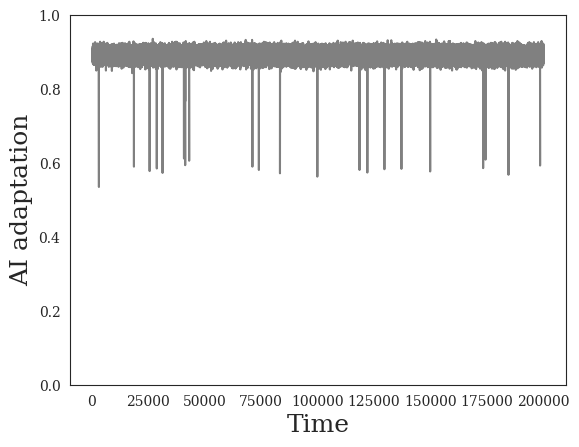

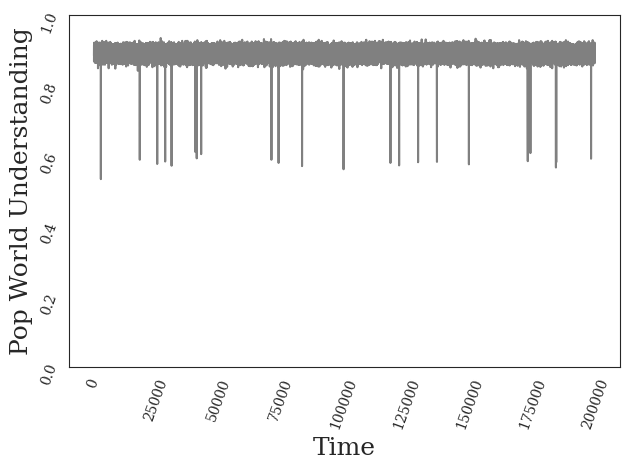

In [10]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'ai'
params_dict['u'] = 0.0001
params_dict['critical'] = True 
params_dict['sim_name'] = 'sec_3_1_2_override'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

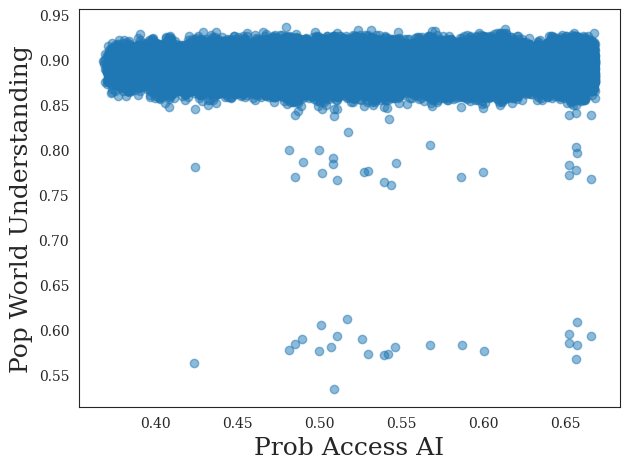

In [11]:
plt.scatter( ai_bias_means/(ai_bias_means+1), learner_adaptation,alpha=0.5)
plt.xlabel("Prob Access AI", fontsize=18)
plt.ylabel("Pop World Understanding", fontsize=18)
plt.tight_layout()
plt.savefig('figures/critical_ai_social_learn_freq_rp_prob_ai_access.png', dpi=400)

collective model understanding


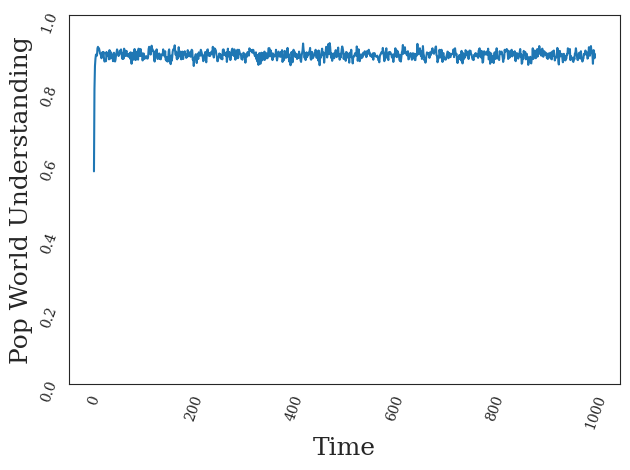

In [12]:
print('collective model understanding')
axis_tick_size = 10
axis_font_size=18
plt.figure()
time_thresh = 1000
plt.plot(range(params_dict['n_records'])[:time_thresh], learner_adaptation[:time_thresh])
plt.ylim((0,1))
plt.ylabel("Pop World Understanding", fontfamily='serif', fontsize=axis_font_size)
plt.xlabel("Time", fontfamily='serif', fontsize=axis_font_size)
plt.xticks(fontfamily='serif', fontsize=axis_tick_size, rotation=70)
plt.yticks(fontfamily='serif', fontsize=axis_tick_size, rotation=70)
plt.tight_layout()
# plt.savefig(dname+f"{params_dict['sim_name']}-population_adap.pdf", dpi=300)
#plt.close()

## Model-centric simulations
### Agents are critical social learners
### AI can learn socially from the mean of the population or do nothing (i.e. vary c_ai)

In [13]:
import copy


params_dict_local_base = copy.copy(base_params_dict) 
params_dict_local_base['social_learning_mode'] = 'ai'
params_dict_local_base['critical'] = True 
params_dict_local_base['sim_name'] = 'sec_3_2_1_ai_update_freq'

world_change_rates = {'slow': 0.0001, 'moderate': 0.1, 'fast': 0.5}
c_AI = np.arange(0, 1.01, 0.1)

world_scores = {}

for world_change, world_change_rate in world_change_rates.items(): 
    params_dict = copy.copy(params_dict_local_base)
    params_dict['u'] = world_change_rate
    
    scores = []

    for c in c_AI:

        social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
            N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=c,
            z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
            social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
        )
        scores.append(learner_adaptation)
        
    world_scores[world_change] = scores

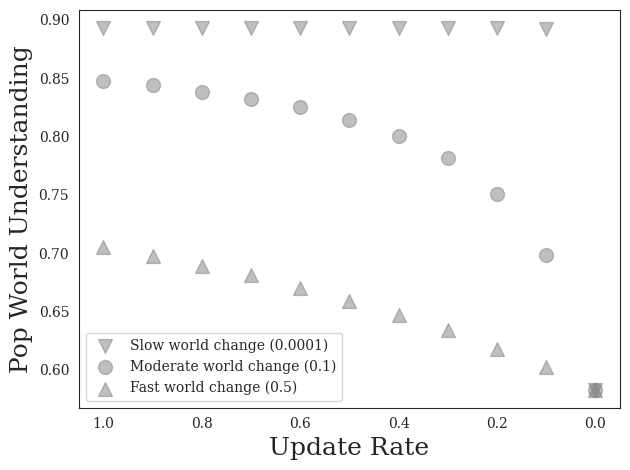

In [14]:
plt.figure()
markers = ['v', 'o',  '^']

for i, (world_change, scores) in enumerate(world_scores.items()): 
    plt.scatter([1-x for x in c_AI], [np.mean(s) for s in scores], s=100,label=f'{world_change.capitalize()} world change ({world_change_rates[world_change]})', alpha=0.5,
                marker=markers[i], c='grey')
plt.gca().invert_xaxis()  
plt.ylabel("Pop World Understanding", fontsize=18)
plt.xlabel("Update Rate", fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig("figures/update_schedule.pdf", dpi=400)

In [15]:
len(scores)

11

## Model-centric simulation
### Agents can learn individually or socially from the AI
### AI can learn individually or socially from the mean of the population

In [ ]:


import copy


params_dict_local_base = copy.copy(base_params_dict) 
params_dict_local_base['social_learning_mode'] = 'ai'
# params_dict_local_base['u'] = 0.01
params_dict_local_base['ai_individ_learn'] = True
params_dict_local_base['sim_name'] = 'sec_3_2_2_ai_individ_learn'

z_AI = np.arange(0, 1.1, 0.1)
c_AI_i = np.arange(0, 1.1, 0.1)
critical_vary = [False, True]
importlib.reload(utils)
vmin=0.5

for allow_critical in critical_vary: 
    all_scores = []
    for z in z_AI: 
        scores = []
        for c in c_AI_i: 
            
            params_dict = copy.copy(params_dict_local_base)
            params_dict['z_AI_i'] = z
            params_dict['c_AI_i'] = c
            params_dict['critical'] = allow_critical
            social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
                N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=c,
                z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
                social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"],
                ai_individ_learn=params_dict['ai_individ_learn'], c_AI_i=params_dict['c_AI_i'], z_AI_i=params_dict['z_AI_i']
            )
            scores.append(np.mean(learner_adaptation))
        all_scores.append(scores)

    utils.get_heatmap(params_dict, all_scores, xvals=c_AI_i, yvals=z_AI, xlabel='Cost of AI Individual Learning',
                    ylabel='Success Rate for AI Individual Learning', vmin=vmin, vmax=0.95, plt_tag=f'heatmap-critical{allow_critical}')


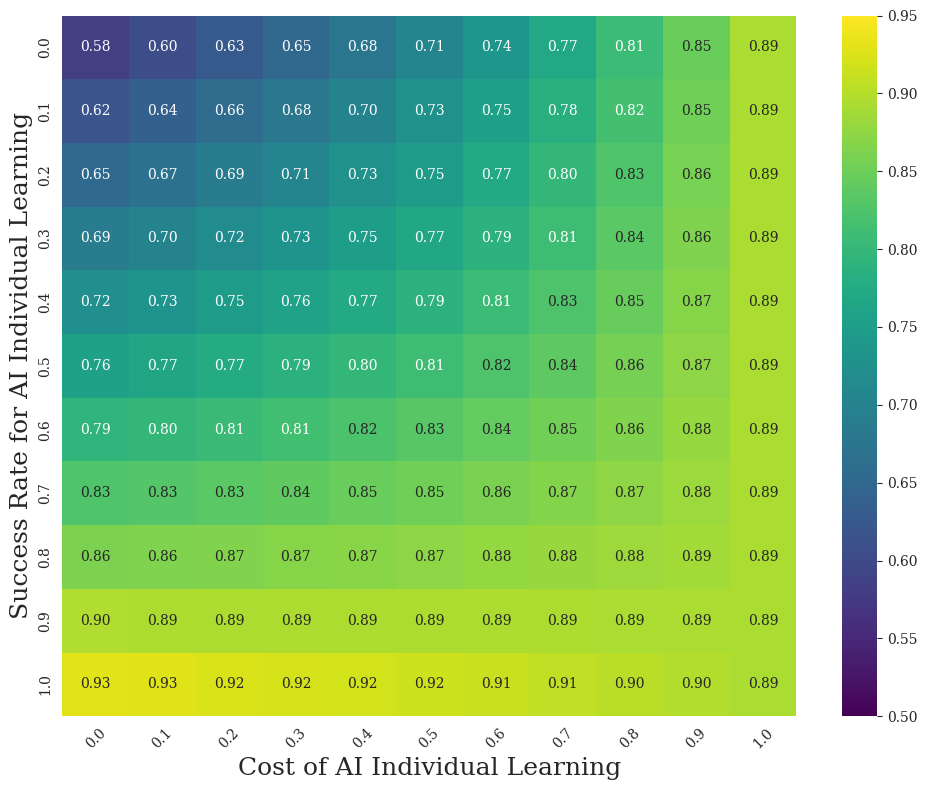

In [ ]:
utils.get_heatmap(params_dict, all_scores, xvals=c_AI_i, yvals=z_AI, xlabel='Cost of AI Individual Learning',
                    ylabel='Success Rate for AI Individual Learning', vmin=0.5, vmax=0.95, plt_tag=f'heatmap-critical{allow_critical}')